In [399]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [316]:
files = os.listdir('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results')

In [228]:
dfs = []
for f in files:
    df1 = pd.read_csv('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results\\Adygeja_Resp_2022-03-20.csv', encoding = 'utf-8')
    dfs.append(df1)

In [229]:
data = pd.concat(dfs)

In [328]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)

In [473]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

KeyError: "None of [Index(['customer inn', 'supplier inn', 'protocol date', 'doc'], dtype='object')] are in the [columns]"

In [238]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

C:\Temp\ipykernel_9852\731554311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st date'] = data['st date'].astype('datetime64[ns]')
C:\Temp\ipykernel_9852\731554311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['end date'] = data['end date'].astype('datetime64[ns]')


In [239]:
date_list = pd.date_range('01.01.2019', '01.05.2023', freq='M')

In [241]:
t = (data.iloc[1])

In [243]:
d = list(map(lambda x: datetime.datetime(2019,6,25)<= x<= datetime.datetime(2021,12,31),date_list))

In [244]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [245]:
t_arr = np.zeros(len(date_list))

In [247]:
for r in data.iterrows():
    t_arr+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [663]:
df = pd.DataFrame(t_arr)

<AxesSubplot:>

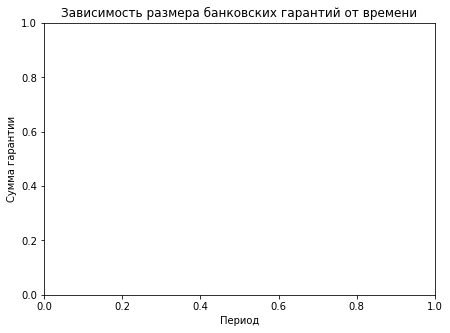

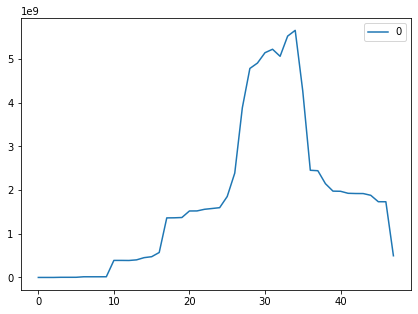

In [664]:
rcParams['figure.figsize'] = 7,5
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.title('Зависимость размера банковских гарантий от времени')
df.plot()

# Задачи
* Подгрузка данных и их форматирование
* Анализ Корреляции двух рядов
* Продумать методы прогнозирования ряда
 + Какие модели можно использовать
 + Что делать с идеей аккумулирующего эффекта
 + Первый драфт


In [437]:
res = pd.DataFrame(results.iloc[0])

In [666]:
res1 = pd.DataFrame(res[-43:])
res1 = res1.rename_axis('date').reset_index()
res1 = res1.rename(columns={0: "credit"})
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')
res1 = res1.set_index('date')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [445]:
res1

,credit
date,
2019-01-31,3202534
2019-02-28,3504045
2019-03-31,4174296
2019-04-30,4637280
2019-05-31,3345201
2019-06-30,4124086
2019-07-31,5143083
2019-08-31,5062245
2019-09-30,5264321


In [337]:
df2 = pd.DataFrame(df[:43])

In [450]:
df2 = df2.rename(columns={0: "amount"})
df2 = df2.rename_axis('date').reset_index()
df2['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

ValueError: cannot insert date, already exists

In [451]:
df2 = df2.set_index('date')

In [452]:
df2

,amount
date,
2019-01-31,0.000000e+00
2019-02-28,0.000000e+00
2019-03-31,0.000000e+00
2019-04-30,3.351258e+06
2019-05-31,3.351258e+06
2019-06-30,3.512462e+06
2019-07-31,1.527409e+07
2019-08-31,1.527409e+07
2019-09-30,1.527409e+07


In [583]:
data1 = pd.concat([df2,res1], axis=1, join='inner')

In [584]:
data1['N'] = list(range(1,44))
data1 = data1.reindex(columns=['N', 'credit', 'amount'])

In [585]:
data1

,N,credit,amount
date,,,
2019-01-31,1,3202534,0.000000e+00
2019-02-28,2,3504045,0.000000e+00
2019-03-31,3,4174296,0.000000e+00
2019-04-30,4,4637280,3.351258e+06
2019-05-31,5,3345201,3.351258e+06
2019-06-30,6,4124086,3.512462e+06
2019-07-31,7,5143083,1.527409e+07
2019-08-31,8,5062245,1.527409e+07
2019-09-30,9,5264321,1.527409e+07


In [684]:
r1 = data1.N.corr(data1.amount)
r2 = data1.credit.astype(int).corr(data1.amount)
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r1, 3))
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r2, 3))

Значение коэффициента корреляции между объемом банковских гарантий и периодом =  0.735
Значение коэффициента корреляции между объемом банковских гарантий и периодом =  0.657


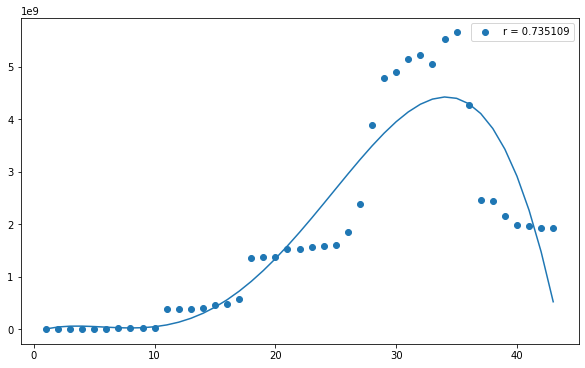

In [693]:
x = data1.N
y = data1.amount
z = np.polyfit (x, y, 4 )
p = np.poly1d (z)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot (x, p(x))
plt.legend(['r = 0.735109'])
plt.show()

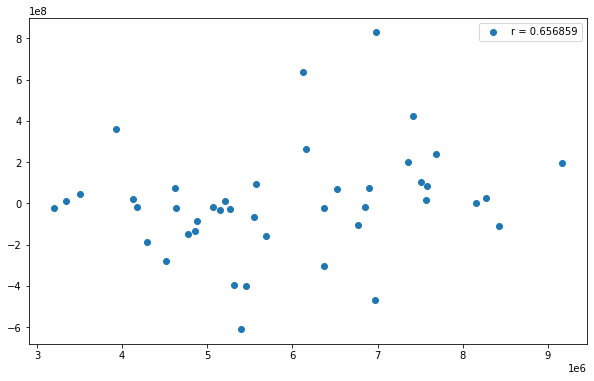

In [690]:
x2 = data1.credit.astype(int)
y2 = new_data.amount
plt.figure(figsize=(10,6))
plt.scatter(x2,y2)
plt.legend(['r = 0.656859'])
plt.show()

In [271]:
import scipy.stats

## Прогнозирование
sklearn:
* OLS и GLS - разница
* Регуляризация L1, L2

Этапы жизни модели:
* EDA
* preprocessing (Standartscaler, RFE and feature selection)
* data to : train, test, predict
    + fit
    + predict on test ( Metrics: r2,MAPE,MAE)
    + predict on predict with fitting on train+test


y = x0 + a1x1 + b(x2)^ + a2*t

### Что посмотреть:
* Борьба с сезнонностью (Ряд Фурье, STL разложение)
* Модели Экспоненциального сглаживания  (ETS Хольт-Уинтерс)
* ACF
* stl = STL(*params)
* res = stl.fit(y)

<AxesSubplot:title={'center':'Гистограмма распределения гарантий'}>

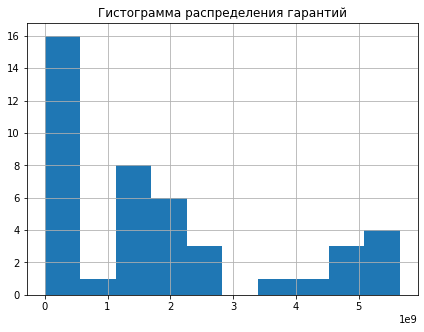

In [695]:
plt.title('Гистограмма распределения гарантий')
rcParams['figure.figsize'] = 7,5
data1.amount.hist()

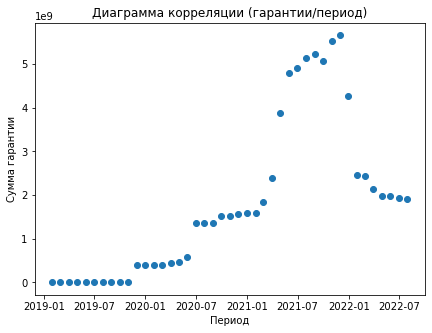

In [696]:
plt.title('Диаграмма корреляции (гарантии/период)')
plt.scatter(data1.index, data1.amount)
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.show()

In [619]:
stl = STL(df2, period=4,).fit()

In [343]:
from pylab import rcParams

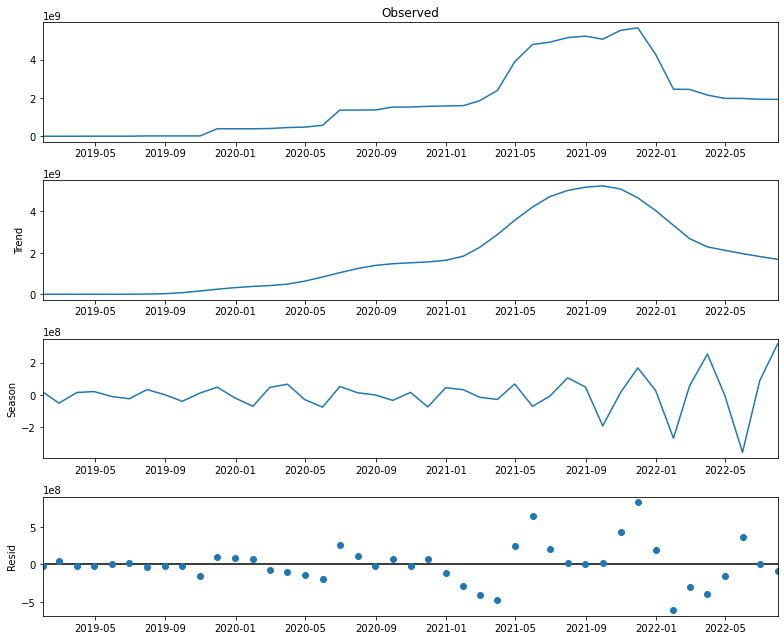

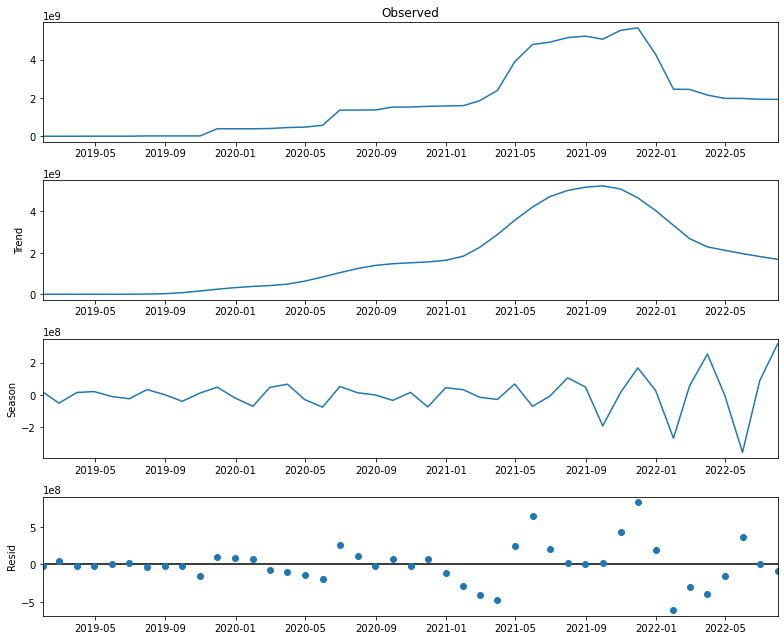

In [575]:
rcParams['figure.figsize'] = 11,9
stl.plot()

In [658]:
observed = pd.DataFrame(stl.observed)
season = pd.DataFrame(stl.seasonal)
trend = pd.DataFrame(stl.trend)

In [659]:
new_data = pd.DataFrame(observed['amount'] - season['season'] - trend['trend'])

In [660]:
new_data = new_data.rename(columns={0: "amount"})

In [345]:
from statsmodels.tsa.stattools import adfuller

In [479]:
adf_test = adfuller(data1.amount)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.8988361046387081
Ряд не стационарный


In [661]:
adf_test = adfuller(new_data.amount)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.20981332251896695
Ряд не стационарный


In [305]:
from statsmodels.graphics.tsaplots import plot_acf

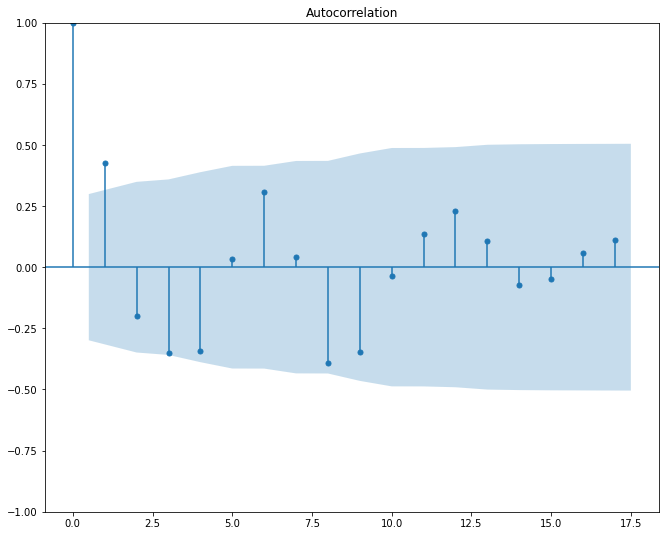

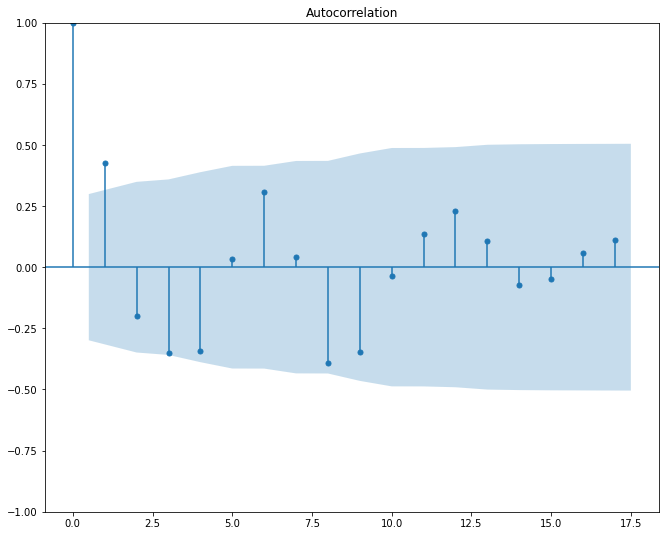

In [576]:
plot_acf(stl.resid)

### Что сделать:
* Построить регрессию от времени
* Построить регрессию от времени + кредиты
* Построить регрессию от кредитов
* Сравнить между собой по r^2,MAE,MAPE
* Экспоненциальное сглаживание


In [595]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [557]:
st = pd.DataFrame(stl.observed)

In [687]:
new_data['N'] = list(range(1,44))

In [688]:
new_data

,amount,N
date,,
2019-01-31,-2.076548e+07,1
2019-02-28,4.711244e+07,2
2019-03-31,-1.974566e+07,3
2019-04-30,-2.271750e+07,4
2019-05-31,1.063441e+07,5
2019-06-30,2.107857e+07,6
2019-07-31,-3.179291e+07,7
2019-08-31,-1.602452e+07,8
2019-09-30,-2.572986e+07,9


In [352]:
from sklearn.linear_model import LinearRegression

In [652]:
x_train = pd.DataFrame(new_data.N[:32])
y_train = pd.DataFrame(new_data.amount[:32])
x_test = pd.DataFrame(new_data.N[32:])
y_test = pd.DataFrame(new_data.amount[32:])

In [653]:
model = LinearRegression()

In [654]:
model.fit(x_train, y_train)

LinearRegression()

In [655]:
Y_test = model.predict(x_test)

In [656]:
Y_test

array([[3.88859631e+09],
       [4.04266601e+09],
       [4.19673570e+09],
       [4.35080539e+09],
       [4.50487508e+09],
       [4.65894477e+09],
       [4.81301446e+09],
       [4.96708415e+09],
       [5.12115385e+09],
       [5.27522354e+09],
       [5.42929323e+09]])

In [657]:
y_test

,amount
date,
2021-09-30,5.251483e+09
2021-10-31,5.506897e+09
2021-11-30,5.485545e+09
2021-12-31,4.239108e+09
2022-01-31,2.720461e+09
2022-02-28,2.385339e+09
2022-03-31,1.892352e+09
2022-04-30,1.975269e+09
2022-05-31,2.327039e+09


In [616]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [618]:
mae = mean_absolute_error(y_test, Y_test)
mse = mean_squared_error(y_test, Y_test)
R2 = r2_score(y_test, Y_test)
print(mae, mse, R2)

2203436610.3321967 5.910503982556842e+18 -1.6513729524698673


In [613]:
y_test

,amount
date,
2021-09-30,5.059666e+09
2021-10-31,5.521585e+09
2021-11-30,5.653194e+09
2021-12-31,4.266043e+09
2022-01-31,2.452139e+09
2022-02-28,2.441731e+09
2022-03-31,2.145387e+09
2022-04-30,1.974752e+09
2022-05-31,1.971281e+09
